# IBM HR EMPLOYEE ATTRITION 


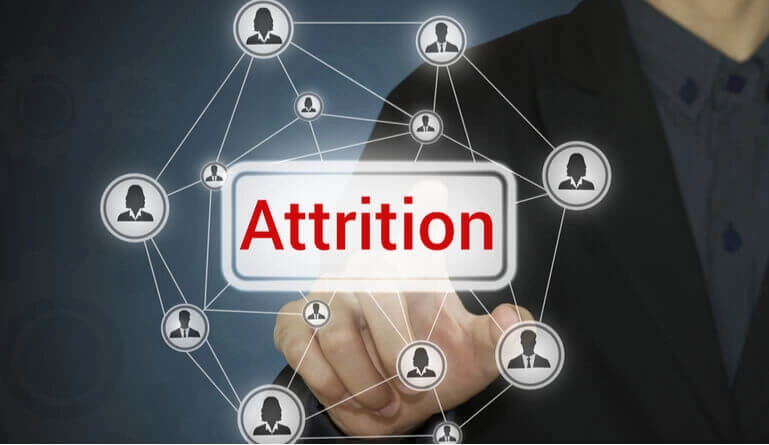

In [ ]:
!pip install xgboost

In [ ]:
#IMPORTING NEEDED LIBRARIES
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')


In [ ]:
df=pd.read_csv('/Users/vikram/Downloads/WA_Fn-UseC_-HR-Employee-Attrition.csv')
df

In [ ]:
df.columns

In [ ]:
df.dtypes

In [ ]:
df.isnull().sum()

In [ ]:
plt.figure(figsize=(12,10))
sns.heatmap(df.isnull())

#### no null values

# EDA  (EXPLORATORY DATA ANALYSIS)

In [ ]:
df.describe()

std is bit higher in some columns such as hourly rate,employee number

right skewness present in some columns such as YearsAtCompany,YearsInCurrentRole,etc

In [ ]:
plt.figure(figsize=(18,12))
sns.heatmap(df.describe(),annot=True,linecolor='black',linewidths=0.2,cmap='Pastel2')

In [ ]:
df['Gender'].value_counts()

In [ ]:
sns.barplot(data=df,x='Attrition',y='JobLevel',hue='Gender')

Male are more in numbers than female and are almost at a same level in both the attrition cases

In [ ]:
df['Attrition'].value_counts()

In [ ]:
plt.figure(figsize=(10,8))
df.Attrition.value_counts().plot.pie(explode=[0.05,0.05],autopct='%1.1f%%',shadow=False);

**TARGET COLUMN IS CONTAINING UNBALANCED DATA**

##### 83.9% VALUE HAS NO ATTRITON 

##### 16.1% HAS YES ATTRITION

In [ ]:
sns.barplot(data=df,x='Attrition',y='TotalWorkingYears',hue='Gender',color='yellow')

TOTAL WORKING HOURS ARE SAME FOR BOTH MALE AND FEMALE WHICH IS GOOD FOR THE OFFICE ENVIRONMENT IN YES ATTRITION

In [ ]:
sns.barplot(data=df,x='Attrition',y='Education',hue='Gender',color='pink')

EDUCATION FOR BOTH YES NO ATTRITION ARE SAME ,HENCE EDUCATION IS NOT THE REASON FOR ATTRITION


In [ ]:
    fig, ax = plt.subplots(ncols= 2, figsize = (14,6))   
    #boxplot for comparison
    sns.boxplot(x = 'Attrition', y = 'DistanceFromHome', data=df, ax=ax[0])
    ax[0].set_title("DistanceFromHome vs Attrition")
    
    #distribution plot
    ax[1].set_title("Distribution of DistanceFromHome")
    ax[1].set_ylabel("Frequency")
    sns.distplot(a = df['DistanceFromHome'], ax=ax[1], kde=True,color='pink')
    
    plt.show()

DistanceFromHome have some skewnesss present and hence is more likely to be the reason for yes attrition

In [ ]:
    fig, ax = plt.subplots(ncols= 2, figsize = (14,6))   
    #boxplot for comparison
    sns.boxplot(x = 'Attrition', y = 'Age', data=df, ax=ax[0])
    ax[0].set_title("Age vs Attrition")
    
    #distribution plot
    ax[1].set_title("Distribution of Age")
    ax[1].set_ylabel("Frequency")
    sns.distplot(a = df['Age'], ax=ax[1], kde=True,color='orange')
    
    plt.show()

age is normally distributed AND young age tend to change job than older ones

age has some outliers present in data

In [ ]:
fig, ax = plt.subplots(ncols= 2, figsize = (14,6))   
#boxplot for comparison
sns.boxplot(x = 'Attrition', y = 'DailyRate', data=df, ax=ax[0])
ax[0].set_title("DailyRate vs Attrition")
    
#distribution plot
ax[1].set_title("Distribution of DailyRate")
ax[1].set_ylabel("Frequency")
sns.distplot(a = df['DailyRate'], ax=ax[1], kde=True,color='black')
    
plt.show()

daily rate does not have much impact on attrition

In [ ]:
fig, ax = plt.subplots(ncols= 2, figsize = (14,6))   
#boxplot for comparison
sns.boxplot(x = 'Attrition', y = 'PercentSalaryHike', data=df, ax=ax[0])
ax[0].set_title("PercentSalaryHike vs Attrition")
    
#distribution plot
ax[1].set_title("Distribution of PercentSalaryHike")
ax[1].set_ylabel("Frequency")
sns.distplot(a = df['PercentSalaryHike'], ax=ax[1], kde=True,color='brown')
    
plt.show()

PercentSalaryHike is skewed toward right 
salary hike also have some role in attrition

it also has outliers 

In [ ]:
fig, ax = plt.subplots(ncols= 2, figsize = (14,6))   
#boxplot for comparison
sns.boxplot(x = 'Attrition', y = 'TotalWorkingYears', data=df, ax=ax[0])
ax[0].set_title("TotalWorkingYears vs Attrition")
    
#distribution plot
ax[1].set_title("Distribution of TotalWorkingYears")
ax[1].set_ylabel("Frequency")
sns.distplot(a = df['TotalWorkingYears'], ax=ax[1], kde=True,color='green')
    
plt.show()

OUTLIERS PRESENT IN TOTAL WORKING YEARS DATA AND ALSO IT IS SKEWED POSITIVELY.

TOTALWORKINGYEARS IS ALSO THE REASON FOR ATTRTION AS THE CLIENT PREFER TO TAKE TO TALK/WORK WITH FAMILIAR EMPLOYEES,SO 
SOME STAY SOME LEAVE.


In [ ]:
sns.barplot(data=df,x='PercentSalaryHike',y='PerformanceRating',color='pink')

HIGHER THE PerformanceRating HIGH WOULD BE PERCENTAGE HIKE AND DAILY RATE

In [ ]:
plt.figure(figsize=(10,8))
sns.lineplot(data=df,x='YearsAtCompany',y='JobLevel',color='blue')

AS YEARS AT CO. RAISES JOB LEVEL ALSO INCREASES

In [ ]:
plt.figure(figsize=(10,8))
sns.lineplot(data=df,x='WorkLifeBalance',y='Attrition',color='orange')

MAINTAINING WorkLifeBalance HELP IN KEEPING THE EMPLOYEE STAY AND ALSO COMPANY LIKES THOSE EMPLOYEE TOO,SOO WONT FIRE THEM 

In [ ]:
plt.figure(figsize=(10,8))
sns.countplot(data=df,x='YearsSinceLastPromotion',hue='Attrition')

In [ ]:
plt.figure(figsize=(10,8))
sns.countplot(data=df,x='JobInvolvement',hue='Attrition')

IT IS SEEN THAT THOSE EMPLOYEE WHO  WERE NOT IN JOB INVOLVEMENT LEFT THE JOB

ALSO THE EMPLOYEE WITH JOB INVOLVEMENT ALSO LEFT THE JOB

STILL THE COUNT FOR HIGHER JOB INVOLVEMENT ARE STILL WORKING 

In [ ]:
plt.figure(figsize=(10,8))
sns.countplot(data=df,x='JobSatisfaction',hue='Attrition')

JobSatisfaction IS ALSO A NECESSARY PART FOR EMPLOYEE TO STAY IN COMPANY

HE/SHE IF SATISFIED WITH THE JOB WOULD DO A GOOD JOB AND NOT LEAVE THE COMPANY AND SO CAN WE SEE IN THE ABOVE GRAPH

In [ ]:
plt.figure(figsize=(10,8))
df.EducationField.value_counts().plot.pie(explode=[0.05,0.05,0.05,0.05,0.05,0.05],autopct='%1.1f%%',shadow=False);

There are more people with a Life sciences followed by medical and marketing

In [ ]:
fig, ax = plt.subplots(ncols= 2, figsize = (14,6))   


sns.countplot(data=df, y = "EducationField", hue="Attrition",ax=ax[0])
ax[0].set_title("EducationField vs Attrition")



ax[1].set_title("Education vs Attrition")
sns.countplot(data=df, x = "Education", hue="Attrition",ax=ax[1])
plt.show()

Employee's in the EducationField of Life sciences and medical have highest attrition levels.

When compared with Education level, we have observed that employees in the highest level of education in there field of study have left the company. We can conclude that EducationField is a strong indicator of attrition.

educaion level 3 are having more tendency to yes attrtion and is low with level 5


In [ ]:
plt.figure(figsize=(10,8))
df.Education.value_counts().plot.pie(explode=[0.05,0.05,0.05,0.05,0.05],autopct='%1.1f%%',shadow=False);

EDUCATION LEVEL 3 ARE HIGHER IN NUMBERS followed by LEVEL 4 AND 3

In [ ]:
#ID OF EMPLYEE FROM EACH DEPT. HAVING LEAST SALARY
df[['EmployeeNumber',
      'Department',
      'MonthlyRate','Attrition']].groupby(['Department']).agg('min')

In [ ]:
df['BusinessTravel'].value_counts()

In [ ]:
df['Department'].value_counts()

In [ ]:
x = df[(df['BusinessTravel'] == 'Travel_Frequently') & 
    (df['Department'] == 'Sales') &
    (df['MonthlyRate'] > 5000)][['EmployeeNumber',
                                  'Department',
                                  'MonthlyRate']].sort_values(by = 'MonthlyRate',
                                                              ascending = False)
x.head(20)


In [ ]:
# find the avg salary
avg_sal = df['MonthlyRate'].mean()

df[(df['TotalWorkingYears'] > 10) &
    (df['MonthlyRate'] < avg_sal)][['EmployeeNumber',
                                      'MonthlyRate',
                                     'Department','Attrition']].sort_values(by = 'MonthlyRate',
                                                                ascending = False).head(20)

#### ALL THE EMPLOYEE WHO HAVE 10 YRS OF EXPERIENCE BUT STILL GET LESS THAN AVERAGE SALARY IN THE ORGANIZATION

SALES CATEGORY GETTING SALARY BELOW AVG TEND TO LEAVE JOB

In [ ]:
df[(df['YearsInCurrentRole'] > 5)][['EmployeeNumber',
                                        'MonthlyRate']].sort_values(by = 'MonthlyRate').head(10)

EMPLOYEE GETTING LESS SALARY AND ARE WORKING FROM 5 YEARS

# CORRELATIION

In [ ]:
df.corr()

In [ ]:
plt.figure(figsize=(30,25))
sns.heatmap(df.corr(),annot=True,linewidths=0.2,linecolor='black',cmap='BuPu')

1)performance rating and percentage salary hike are highly correlated

2)yearsatcurrentrole, yearsatcompany, yearssincelastpromotion and yearswithcurrmanager are correlated with each other.


In [ ]:
df['EmployeeCount'].value_counts()

In [ ]:
df['StandardHours'].value_counts()

In [ ]:
# lets drop some useless columns

df.drop(['EmployeeNumber','Over18','StandardHours','EmployeeCount'],inplace=True,axis=1)
df.head()


In [ ]:
# lets check the column which are categorical in nature or are strings
df.select_dtypes('object').columns

In [ ]:
#Now lets assign a labels to our quality variable

from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()

In [ ]:
df['Attrition'] = LE.fit_transform(df['Attrition'])
df['BusinessTravel'] = LE.fit_transform(df['BusinessTravel'])
df['Department'] = LE.fit_transform(df['Department'])
df['EducationField'] = LE.fit_transform(df['EducationField'])
df['Gender'] = LE.fit_transform(df['Gender'])
df['JobRole'] = LE.fit_transform(df['JobRole'])
df['MaritalStatus'] = LE.fit_transform(df['MaritalStatus'])
df['OverTime'] = LE.fit_transform(df['OverTime'])
df.head()

# Checking outliers

In [ ]:
sns.set(style="darkgrid")
df.plot(kind='box',subplots=True,layout=(6,6),figsize=(10,15),color = 'green')
plt.tight_layout()

OUTLIERS PRESENT IN SOME COLUMNS

## REMOVING THEM BY ZSCORE

In [ ]:
from scipy.stats import zscore

z=np.abs(zscore(df))
z

In [ ]:
threshold=3
print(np.where(z>3))

In [ ]:
df1=df[(z<3).all(axis=1)]
df1


# Data Preprocessing

In [ ]:

# splittig the target variables
y = df['Attrition']
x = df.drop(['Attrition'], axis = 1)

# lets check teh shape of the new var
print("Shape of x :", x.shape)
print("Shape of y :", y.shape)

# Checking skewness

In [ ]:
df1.skew()

In [ ]:


column=['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager']

for i in column:
    sns.distplot(df[i])
    plt.show()



SKEWNESS PRESENT IS SOME COLUMNS

### REMOVING IT WITH POWER TRANSFORM

In [ ]:
from sklearn.preprocessing import power_transform

df1=power_transform(x,method='yeo-johnson')
df1

### SCALLING

In [ ]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(x)
x

# MODEL BUILDING

In [ ]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.22,random_state=123)


In [ ]:
#1 MODEL

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report,confusion_matrix


lo=LogisticRegression()
lo.fit(x_train,y_train)
lo.score(x_train,y_train)
predlo=lo.predict(x_test)



print('Accuracy Score is',accuracy_score(y_test,predlo))
print('Confusion Matrix''\n',confusion_matrix(y_test,predlo))
print(classification_report(y_test,predlo))

In [ ]:
#2 MODEL

from sklearn.tree import DecisionTreeClassifier



dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)
preddtc=dt.predict(x_test)
print('Accuracy score''\n',accuracy_score(y_test,preddtc))
print('Confusion Matrix''\n',confusion_matrix(y_test,preddtc))
print('Classification Report''\n',classification_report(y_test,preddtc))

In [ ]:
#model 3

from sklearn.ensemble import RandomForestClassifier

rfc=RandomForestClassifier()
rfc.fit(x_train,y_train)
predrfc=dt.predict(x_test)
print('Accuracy score''\n',accuracy_score(y_test,predrfc))
print('Confusion Matrix''\n',confusion_matrix(y_test,predrfc))
print('Classification Report''\n',classification_report(y_test,predrfc))

In [ ]:
#MODEL 4

from sklearn.svm import SVC

svc=SVC()
svc.fit(x_train,y_train)
predsvc=svc.predict(x_test)
print('Accuracy score''\n',accuracy_score(y_test,predsvc))
print('Confusion Matrix''\n',confusion_matrix(y_test,predsvc))
print('Classification Report''\n',classification_report(y_test,predsvc))

In [ ]:
#MODEL 5 Gradient Boosting Classifier


from sklearn.ensemble import GradientBoostingClassifier

gbk = GradientBoostingClassifier()
gbk.fit(x_train, y_train)
predgbk = gbk.predict(x_test)
print('Accuracy score''\n',accuracy_score(predgbk,y_test))
print('Confusion Matrix''\n',confusion_matrix(y_test,predgbk))
print('Classification Report''\n',classification_report(y_test,predgbk))

In [ ]:
#MODEL 6

from sklearn import neighbors
from sklearn.neighbors import KNeighborsClassifier


knn=KNeighborsClassifier()
knn.fit(x_train,y_train)
predknn= knn.predict(x_test)
print('Accuracy score''\n',accuracy_score(predknn,y_test))
print('Confusion Matrix''\n',confusion_matrix(y_test,predknn))
print('Classification Report''\n',classification_report(y_test,predknn))

In [ ]:
#MODEL 7

from sklearn.ensemble import ExtraTreesClassifier


ETC=ExtraTreesClassifier()
ETC.fit(x_train,y_train)
pred_ETC=ETC.predict(x_test)
print('Accuracy score''\n',accuracy_score(y_test,pred_ETC))
print('Confusion Matrix''\n',confusion_matrix(y_test,pred_ETC))
print('Classification Report''\n',classification_report(y_test,pred_ETC))


# Cross Validation


In [ ]:
# Logistic REGRESSION


test_accuracy= accuracy_score(y_test,predlo)

from sklearn.model_selection import cross_val_score
for i in range(2,10):
    cv_score=cross_val_score(lo,x,y,cv=i)
    cv_mean=cv_score.mean()
    print(f"At cross fold {i} the Cross Val score is {cv_mean*100} and Accuracy score is {test_accuracy*100}")

In [ ]:
# DecisionTreeClassifier 


test_accuracy= accuracy_score(y_test,preddtc)

from sklearn.model_selection import cross_val_score
for i in range(2,10):
    cv_score=cross_val_score(dt,x,y,cv=i)
    cv_mean=cv_score.mean()
    print(f"At cross fold {i} the Cross Val score is {cv_mean*100} and Accuracy score is {test_accuracy*100}")

In [ ]:
# RANDOM FOREST CLASSIFIER

test_accuracy= accuracy_score(y_test,predrfc)

from sklearn.model_selection import cross_val_score
for i in range(2,10):
    cv_score=cross_val_score(rfc,x,y,cv=i,n_jobs=2)
    cv_mean=cv_score.mean()
    print(f"At cross fold {i} the Cross Val score is {cv_mean*100} and Accuracy score is {test_accuracy*100}")

In [ ]:
# SUPPORT VECTOR CLASSIFIER

test_accuracy= accuracy_score(y_test,predsvc)

from sklearn.model_selection import cross_val_score
for i in range(2,10):
    cv_score=cross_val_score(svc,x,y,cv=i,n_jobs=2)
    cv_mean=cv_score.mean()
    print(f"At cross fold {i} the Cross Val score is {cv_mean*100} and Accuracy score is {test_accuracy*100}")

In [ ]:
#GRADIENT BOOSTING CLASSIFIER

test_accuracy= accuracy_score(y_test,predgbk)

from sklearn.model_selection import cross_val_score
for i in range(2,10):
    cv_score=cross_val_score(gbk,x,y,cv=i,n_jobs=2)
    cv_mean=cv_score.mean()
    print(f"At cross fold {i} the Cross Val score is {cv_mean*100} and Accuracy score is {test_accuracy*100}")

In [ ]:
#KN CLASSIFIER

test_accuracy= accuracy_score(y_test,predknn)

from sklearn.model_selection import cross_val_score
for i in range(2,10):
    cv_score=cross_val_score(knn,x,y,cv=i)
    cv_mean=cv_score.mean()
    print(f"At cross fold {i} the Cross Val score is {cv_mean*100} and Accuracy score is {test_accuracy*100}")

In [ ]:
# EXTRA TRESS CLASSIFIER

test_accuracy= accuracy_score(y_test,pred_ETC)

from sklearn.model_selection import cross_val_score
for i in range(2,10):
    cv_score=cross_val_score(ETC,x,y,cv=i,n_jobs=2)
    cv_mean=cv_score.mean()
    print(f"At cross fold {i} the Cross Val score is {cv_mean*100} and Accuracy score is {test_accuracy*100}")

# ALL MODEL ARE PERFORMING BETTER OUT WHICH GRADIENT BOOSTING CLASSIFIER IS PERFORMING BETTER

**difference between accuracy score and cv score is low for GRADIENT BOOSTING CLASSIFIER**

# HYPERPARAMETER TUNING

In [ ]:
from sklearn.model_selection import GridSearchCV

#creating the parameter list to pass in GrideSearchcv
parameters={'max_features':['auto','sqrt','log2'],
           'max_depth':[4,5,6,7,8,9,10],
           'criterion':['gini','entropy']}

gcv=GridSearchCV(RandomForestClassifier(),parameters,cv=5,scoring="accuracy")
gcv.fit(x_train,y_train)
gcv.best_params_

In [ ]:
gcv_pred=gcv.best_estimator_.predict(x_test)#predicting with best parameters
print('Accuracy score''\n',accuracy_score(y_test,gcv_pred))#checking the final score

print('Confusion Matrix''\n',confusion_matrix(y_test,gcv_pred))
print('Classification Report''\n',classification_report(y_test,gcv_pred))

In [ ]:
from sklearn.model_selection import GridSearchCV

#creating the parameter list to pass in GrideSearchcv
parameters1={'max_features':['auto','sqrt','log2'],
           'max_depth':[4,5,6,7,8,9,10], "max_leaf_nodes": [2, 5, 10]}

gcv1=GridSearchCV(GradientBoostingClassifier(),parameters1,cv=6,scoring="accuracy")
gcv1.fit(x_train,y_train)
gcv1.best_params_

In [ ]:
gcv_pred1=gcv1.best_estimator_.predict(x_test)#predicting with best parameters
print('Accuracy score''\n',accuracy_score(y_test,gcv_pred1))#checking the final score
print('Confusion Matrix''\n',confusion_matrix(y_test,gcv_pred1))
print('Classification Report''\n',classification_report(y_test,gcv_pred1))

#### FINALLY RANDOM FOREST IS THE BEST MODEL AS ITS FALSE POSITIVE AND FALSE NEGATIVE ARE LOW 


# Final Prediction Submission

In [ ]:
import numpy as np
a = np.array(y_test)
predicted = np.array(gcv.best_estimator_.predict(x_test))
df = pd.DataFrame(zip(a,predicted), columns = ["Original","Predicted"])
df

# ROC AUC plot

In [ ]:
from sklearn.metrics import plot_roc_curve

plot_roc_curve(gcv.best_estimator_,x_test,y_test)
plt.title("ROC AUC Plot")
plt.show()

###### ACCURACY SCORE IS 90.45 AND AUC = 85

# Saving the model in pickle format

In [ ]:
import pickle
# open a file, where you ant to store the data
file = open('HR_ATTRITION.pkl', 'wb')

# dump information to that file
pickle.dump(gcv.best_estimator_, file)

In [ ]:
model  = open('HR_ATTRITION.pkl','rb')
forest = pickle.load(model)